In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""Data Dictionary
Variable :	Definition	Key
survival :	Survival	0 = No, 1 = Yes
pclass :	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex :	Sex	
Age :	Age in years	
sibsp :	# of siblings / spouses aboard the Titanic	
parch :	# of parents / children aboard the Titanic	
                    ticket :	Ticket number	
fare :	Passenger fare	
                    cabin :	Cabin number	
                    embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
"""

In [149]:
df = pd.read_csv("train.csv")
col_2_drop = ["Ticket", "Embarked", "Name", "PassengerId"] #columns that not necessary for model
df = df.drop(columns=col_2_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [150]:
df.drop(columns=["Cabin"], inplace=True) #alot of missing values

In [151]:
df['Sex'] = np.where(df['Sex'] == 'female', 0,1)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
54,0,1,1,65.0,0,1,61.9792
192,1,3,0,19.0,1,0,7.8542
453,1,1,1,49.0,1,0,89.1042
20,0,2,1,35.0,0,0,26.0000
575,0,3,1,19.0,0,0,14.5000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<div style="text-align:center; background-color:#f9f9f9; padding:10px; border:2px solid #4a90e2; border-radius:8px; width:60%; margin:auto;">
    <h2 style="color:#4a90e2; font-family:Arial, sans-serif;">EDA </h2>
</div>

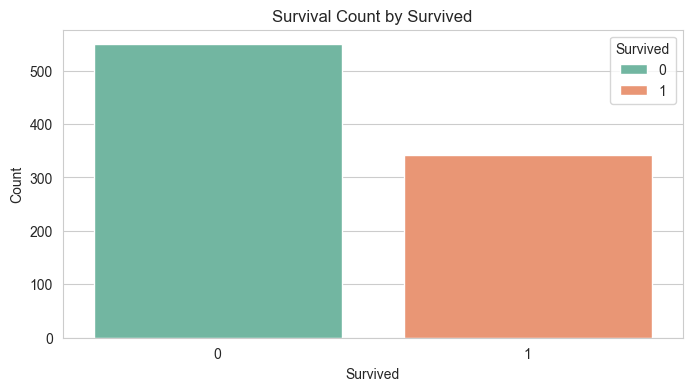

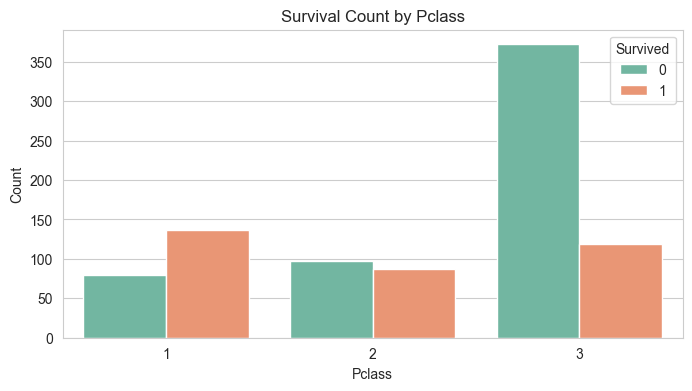

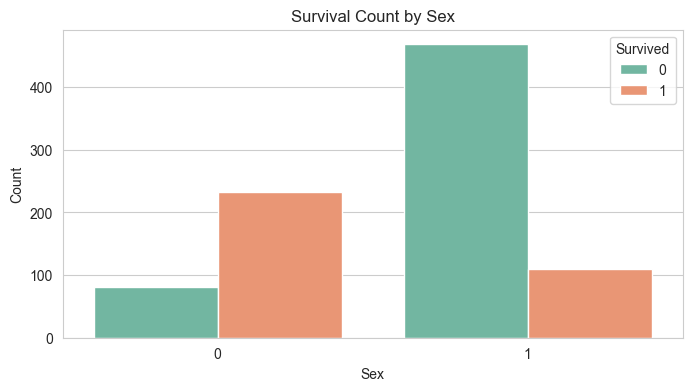

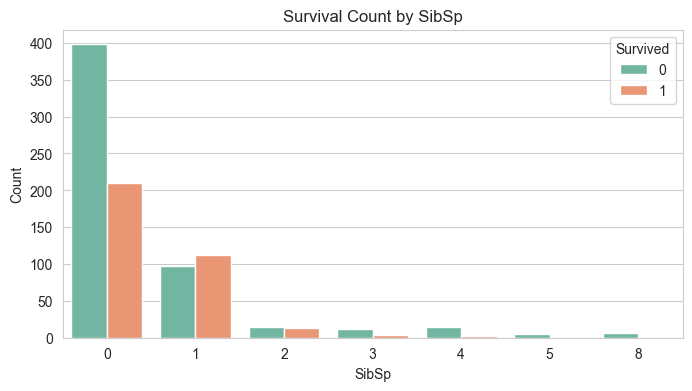

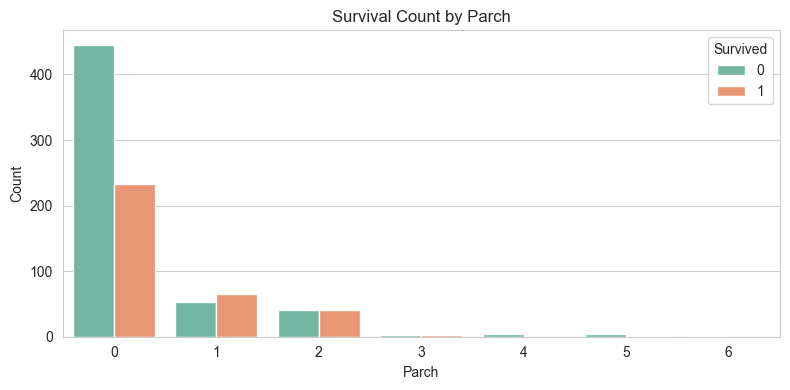

In [153]:
int_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']

sns.set_style("whitegrid")
for col in int_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Survived', palette='Set2')
    plt.title(f'Survival Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. Survived is not an balance class
2. Pclass have a samilar survival for each class, but Class 3 have survival rate very low compare another
3. Most passengers are usually accompanied by 0-2 siblings.
4. Most passengers tend to come with families of 0-2 people.


In [154]:
# create SibSp Bracket
sibsp_bins = [0, 1, 2, np.inf]
sibsp_label = ["0", "1", "2"] #grouping all values >=2 into 2 because it

df["Sib_Bracket"] = pd.cut(
    df["SibSp"].astype("int32"),
    bins=sibsp_bins,
    labels=sibsp_label,
    include_lowest=True,
    right=False,
)
df['Sib_Bracket'] = df['Sib_Bracket'].astype('int32')
df.drop(columns=["SibSp"], inplace=True)

df.groupby("Sib_Bracket")["Survived"].mean()

Sib_Bracket
0    0.345395
1    0.535885
2    0.270270
Name: Survived, dtype: float64

The 1-sibling group shows the highest survival rate among all groups. Let's now test if **Sib_Bracke** is statistically significant for survival.

In [155]:
from scipy.stats import chi2_contingency
def chi_test(col1):
    contingency_table = pd.crosstab(df[col1], df["Survived"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"🔸 Reject H0 → {col1} มีผลต่อ Survived")
    else:
        print(f"✅ Fail to reject H0 → {col1} ไม่มีผลต่อ Survived")

In [156]:
chi_test("Sib_Bracket")

🔸 Reject H0 → Sib_Bracket มีผลต่อ Survived


In [157]:
# create Parch Bracket
Parch_bins = [0, 1, 2, np.inf]
Parch_label = ["0", "1", "2"] #grouping all values >=2 into 2 because it is rare

df["Parch_Bracket"] = pd.cut(
    df["Parch"].astype("int32"),
    bins=Parch_bins,
    labels=Parch_label,
    include_lowest=True,
    right=False,
)
df['Parch_Bracket'] = df['Parch_Bracket'].astype('int32')
df.drop(columns=["Parch"], inplace=True)
df.groupby("Parch_Bracket")["Survived"].mean()

Parch_Bracket
0    0.343658
1    0.550847
2    0.463158
Name: Survived, dtype: float64

The survival rate across the Parch brackets is relatively close to ~50% overall, but we still need to check whether this feature is statistically significant.

In [158]:
chi_test("Parch_Bracket")

🔸 Reject H0 → Parch_Bracket มีผลต่อ Survived


C:\Users\dream\AppData\Local\Temp\ipykernel_856\3645388080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=df, palette="Set2")


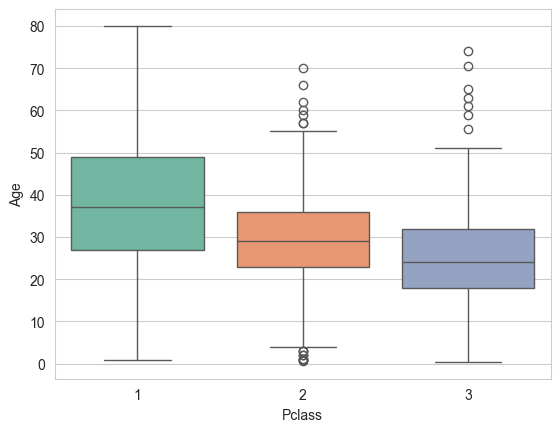

In [159]:
sns.boxplot(x="Pclass", y="Age", data=df, palette="Set2")
plt.show()

The Age column contains outliers, as shown in the boxplot. Therefore, I will fill the missing values with the median of the Age column. The median is a more appropriate measure of central tendency in this case because it is less influenced by outliers than the mean

In [160]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Sib_Bracket,Parch_Bracket
331,0,1,1,45.5,28.5000,0,0
731,0,3,1,11.0,18.7875,0,0
267,1,3,1,25.0,7.7750,1,0
197,0,3,1,42.0,8.4042,0,1
629,0,3,1,24.0,7.7333,0,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Sib_Bracket    891 non-null    int32  
 6   Parch_Bracket  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


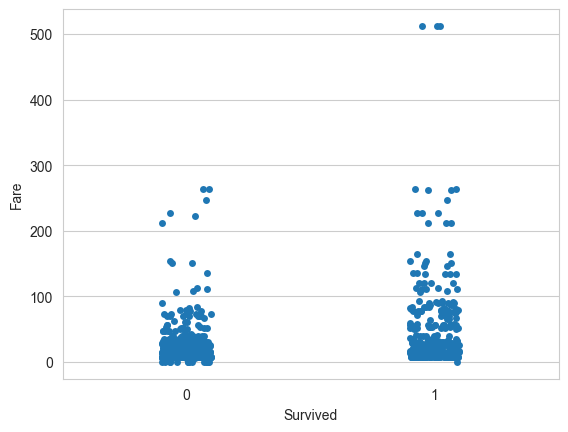

In [162]:
sns.stripplot(data=df, x='Survived', y='Fare')
plt.show()

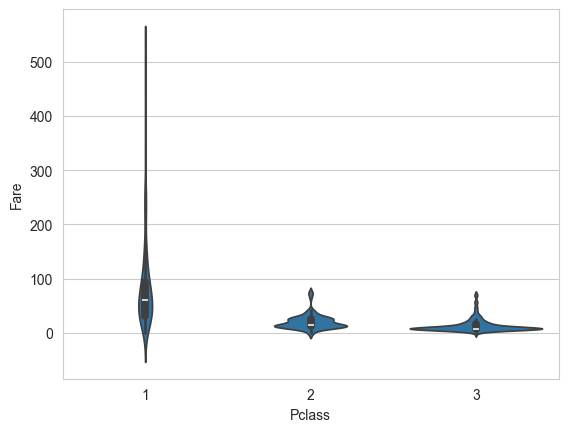

In [163]:
sns.violinplot(data=df, x='Pclass', y='Fare')
plt.show()


`class 2 and 3 have a similarity compare to class 1 that have a wide range`

Text(0.5, 1.0, 'Fare Distribution')

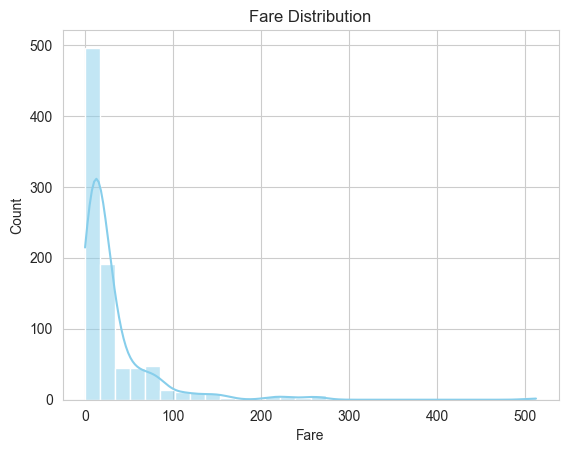

In [164]:
sns.histplot(data=df, x="Fare", bins=30, kde=True, color="skyblue")
plt.title("Fare Distribution")

`Let's test whether Fare is significant in explaining the survival rate.`

In [165]:
import pingouin as pg
#we cant use t-test because fare is not normally distributed
#Mann-Whitney U test
fare_vs_survived = pg.mwu(df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare'], alternative='two-sided')
fare_vs_survived

,U-val,alternative,p-val,RBC,CLES
MWU,129951.5,two-sided,4.553477e-22,0.384245,0.692122


<div style="text-align:center; background-color:#f9f9f9; padding:10px; border:2px solid #4a90e2; border-radius:8px; width:60%; margin:auto;">
    <h2 style="color:#4a90e2; font-family:Arial, sans-serif;">Data Preprocessing </h2>
</div>

In [166]:
test = pd.read_csv("test.csv")
col_2_drop = ["Cabin", "Ticket", "Embarked", "Name"]
test = test.drop(columns=col_2_drop)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [167]:
test["Age"].fillna(df["Age"].median(), inplace=True) #we have to use train median to avoid data leakage
test['Sex'] = np.where(test['Sex'] == 'female', 0,1)

In [168]:
test['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [169]:
# create SibSp Bracket
sibsp_bins = [0, 1, 2, np.inf]
sibsp_label = ["0", "1", "2"] 

test["Sib_Bracket"] = pd.cut(
    test["SibSp"].astype("int32"),
    bins=sibsp_bins,
    labels=sibsp_label,
    include_lowest=True,
    right=False,
)
test['Sib_Bracket'] = test['Sib_Bracket'].astype('int32')
test.drop(columns=["SibSp"], inplace=True)
test['Sib_Bracket'].value_counts()

Sib_Bracket
0    283
1    110
2     25
Name: count, dtype: int64

In [170]:
test['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [171]:
Parch_bins = [0, 1, 2, np.inf]
parch_label = ["0", "1", "2"] 

test["Parch_Bracket"] = pd.cut(
    test["Parch"].astype("int32"),
    bins=Parch_bins,
    labels=parch_label,
    include_lowest=True,
    right=False,
)
test['Parch_Bracket'] = test['Parch_Bracket'].astype('int32')
test.drop(columns=["Parch"], inplace=True)
test['Parch_Bracket'].value_counts()

Parch_Bracket
0    324
1     52
2     42
Name: count, dtype: int64

In [172]:
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Sib_Bracket    891 non-null    int32  
 6   Parch_Bracket  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    int64  
 3   Age            418 non-null    float64
 4   Fare           417 non-null    float64
 5   Sib_Bracket    418 non

In [173]:
test['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True) #use train median to avoid data leakage
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    int64  
 3   Age            418 non-null    float64
 4   Fare           418 non-null    float64
 5   Sib_Bracket    418 non-null    int32  
 6   Parch_Bracket  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


<div style="text-align:center; background-color:#f9f9f9; padding:10px; border:2px solid #4a90e2; border-radius:8px; width:60%; margin:auto;">
    <h2 style="color:#4a90e2; font-family:Arial, sans-serif;">Model Development </h2>
</div>

In [174]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])
test[["Age", "Fare"]] = scaler.transform(test[["Age", "Fare"]])

cat_col = ['Pclass', 'Sib_Bracket', 'Parch_Bracket', 'Sex']
df[cat_col] = df[cat_col].astype('category')
test[cat_col] = test[cat_col].astype('category')

x = pd.get_dummies(df.drop(columns=["Survived"]), drop_first=True)
y = df["Survived"]
df.sample(5)


,Survived,Pclass,Sex,Age,Fare,Sib_Bracket,Parch_Bracket
115,0,3,1,-0.609379,-0.488854,0,0
833,0,3,1,-0.458288,-0.490280,0,0
674,0,2,1,-0.005017,-0.648422,0,0
75,0,3,1,-0.307198,-0.494391,0,0
104,0,3,1,0.599345,-0.488854,2,0


In [175]:
x.sample(5)

,Age,Fare,Pclass_2,Pclass_3,Sex_1,Sib_Bracket_1,Sib_Bracket_2,Parch_Bracket_1,Parch_Bracket_2
777,-1.818103,-0.397241,False,True,False,False,False,False,False
239,0.297164,-0.401268,True,False,True,False,False,False,False
534,0.070528,-0.474005,False,True,False,False,False,False,False
574,-0.987105,-0.486337,False,True,True,False,False,False,False
826,-0.382743,0.489104,False,True,True,False,False,False,False


In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (712, 9), x_test shape: (179, 9)
y_train shape: (712,), y_test shape: (179,)


**Logistic Regression**

In [177]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'solver': ['liblinear', 'newton-cg'], #sklearn recommend 'liblinear' for small datasets
                                          #'newton-cg' for n_sanmples >> n_features * n_classes 
                                          # 'newton-cg' supports only l2 penalty GridSearchCV Might throw warning when combining with other penalties
    'max_iter': [100, 150, 200, 250, 300]
    
}
grid_log = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_log.fit(x_train, y_train)

c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\dream\App

,estimator,LogisticRegression()
,param_grid,"{'C': [0.1, 0.3, ...], 'max_iter': [100, 150, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['liblinear', 'newton-cg']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [178]:
print(grid_log.best_params_)
print(grid_log.best_score_)

{'C': 0.3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7283353948981455


In [179]:
best_log_model = grid_log.best_estimator_
print(classification_report(y_train, best_log_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       439
           1       0.77      0.69      0.73       273

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [180]:
print(classification_report(y_test, best_log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [181]:
y_pred_log = best_log_model.predict(x_test)
log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

`ased on the comparison between the training and testing classification reports, the model does not show signs of overfitting. Both datasets achieve similar precision, recall, and F1-score metrics, which indicates that the model generalizes well to unseen data.`

In [182]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(x, y, model):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:, 1])
    roc_auc = roc_auc_score(y, model.predict_proba(x)[:, 1])

    # Plot
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

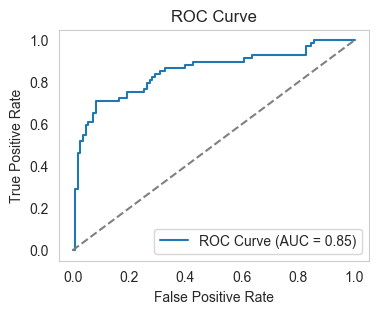

In [183]:
plot_roc_curve(x_test, y_test, best_log_model)

`The ROC curve demonstrates that the model has good discriminative ability, with an AUC score of 0.85. This indicates that the model is able to distinguish between churn and non churn with high degree of accuracy.`

**XGBClassifier**

In [184]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1,],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0.1, 1, 10, 30]
}

# Grid search forcing single‐process to avoid TerminatedWorkerError
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1          
)
grid.fit(x_train, y_train)

c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:38:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [185]:
print(grid_log.best_params_)
print(grid_log.best_score_)

{'C': 0.3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7283353948981455


In [186]:
print(classification_report(y_train, grid.best_estimator_.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       439
           1       0.95      0.87      0.91       273

    accuracy                           0.93       712
   macro avg       0.94      0.92      0.93       712
weighted avg       0.93      0.93      0.93       712



In [187]:
print(classification_report(y_test, grid.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



`Although regularization penalty was applied during model tuning, the results still indicate signs of overfitting. The model performs significantly better on the training set (F1-scores around 0.91–0.95) compared to the test set (F1-scores around 0.75–0.85). This gap suggests that the model may have captured patterns too specifically from the training data and is not generalizing well to unseen data.`

In [188]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.01, 0.05, 0.1,],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    'reg_alpha': [5, 10, 15],
    'reg_lambda': [10, 20, 30]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1           
)
grid.fit(x_train, y_train)

c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [189]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'reg_alpha': 5, 'reg_lambda': 10, 'subsample': 1.0}
0.7330361067503924


In [190]:
print(classification_report(y_train, grid.best_estimator_.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       439
           1       0.90      0.69      0.78       273

    accuracy                           0.85       712
   macro avg       0.87      0.82      0.84       712
weighted avg       0.86      0.85      0.85       712



In [191]:
print(classification_report(y_test, grid.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.85       110
           1       0.85      0.59      0.70        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



`Compared to the previous GridSearchCV run, the model no longer shows signs of overfitting. The gap between training and testing performance has been significantly reduced, which indicates better generalization. `

`However, the recall on class 1 is still relatively low, suggesting that the model struggles to correctly identify positive cases. Further tuning may be required to improve recall on class 1 without sacrificing overall performance.`

In [192]:
from sklearn.metrics import make_scorer, fbeta_score
fbeta_scorer = make_scorer(fbeta_score, beta=2)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=fbeta_scorer,
    cv=5,
    n_jobs=-1           
)
grid.fit(x_train, y_train)

c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:39:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,"make_scorer(f...dict', beta=2)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [193]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'reg_alpha': 5, 'reg_lambda': 20, 'subsample': 1.0}
0.6935631068877944


In [194]:
best_xgb_model = grid.best_estimator_
print(classification_report(y_train, best_xgb_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       439
           1       0.83      0.69      0.75       273

    accuracy                           0.83       712
   macro avg       0.83      0.80      0.81       712
weighted avg       0.83      0.83      0.82       712



In [195]:
print(classification_report(y_test, best_xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



`After tuning the XGBoost model with Fβ-score optimization, the recall for Class 1 increased from 0.59 → 0.65. This suggests that the model now captures more minority positive samples while maintaining overall performance.`


In [196]:
xgb_acc = accuracy_score(y_test, best_xgb_model.predict(x_test))
xgb_prec = precision_score(y_test, best_xgb_model.predict(x_test))
xgb_rec = recall_score(y_test, best_xgb_model.predict(x_test))
xgb_f1 = f1_score(y_test, best_xgb_model.predict(x_test))

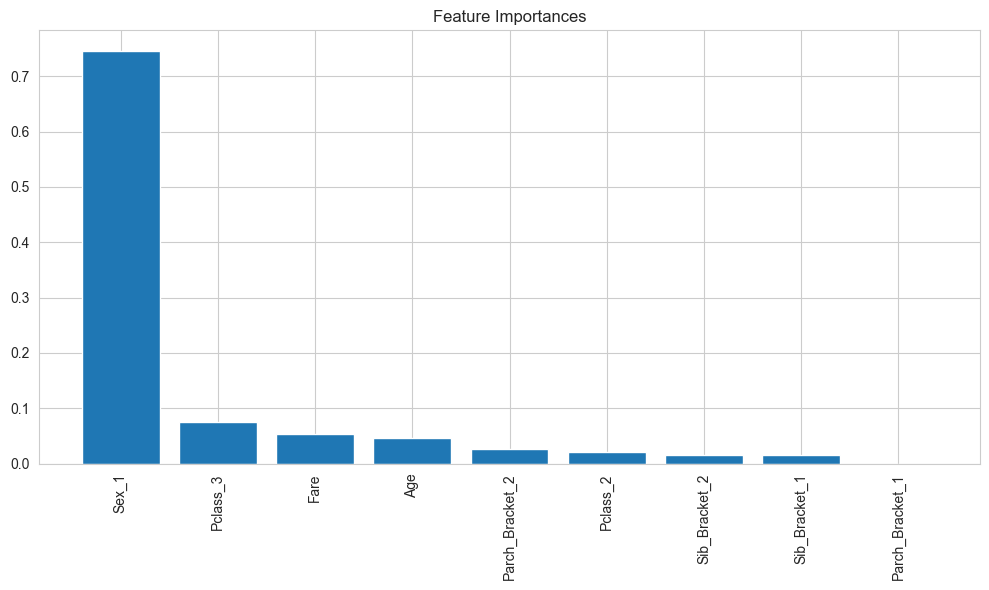

In [197]:
import numpy as np

importance = best_xgb_model.feature_importances_

indice = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importance[indice], align="center")
plt.xticks(range(x.shape[1]), x.columns[indice], rotation=90)
plt.tight_layout()
plt.show()

- **Sex** is the strongest indicator of survival.  
- Other features (Pclass_3, Fare, Age) have minor influence.


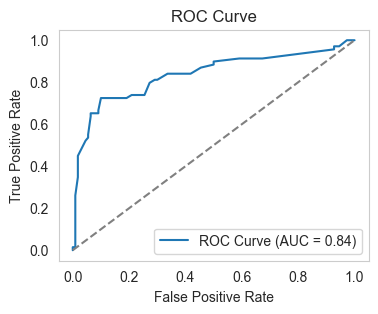

In [198]:
plot_roc_curve(x_test, y_test, best_xgb_model)

Even though **XGBoost** is a more complex ensemble model, its ROC-AUC performance is almost equivalent to **Logistic Regression**.  
This suggests that the underlying relationships in the dataset may be relatively linear, allowing a simpler model like Logistic Regression to perform competitively.


**KNNeighbors**

In [199]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_knn.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [200]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'reg_alpha': 5, 'reg_lambda': 20, 'subsample': 1.0}
0.6935631068877944


In [201]:
best_knn_model = grid.best_estimator_
print(classification_report(y_train, best_knn_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       439
           1       0.83      0.69      0.75       273

    accuracy                           0.83       712
   macro avg       0.83      0.80      0.81       712
weighted avg       0.83      0.83      0.82       712



In [202]:
print(classification_report(y_test, best_knn_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



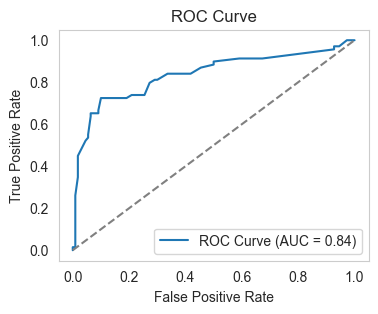

In [203]:
plot_roc_curve(x_test, y_test, best_knn_model)

In [204]:
knn_acc = accuracy_score(y_test, best_knn_model.predict(x_test))
knn_prec = precision_score(y_test, best_knn_model.predict(x_test))
knn_rec = recall_score(y_test, best_knn_model.predict(x_test))
knn_f1 = f1_score(y_test, best_knn_model.predict(x_test))

KNN shows performance similar to XGBoost and Logistic Regression, suggesting that the dataset is not highly complex and linear models can perform competitively.

**Random Forest**

In [205]:
rdf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [0.1, 0.2, 0.3],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rdf = GridSearchCV(estimator=rdf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_rdf.fit(x_train, y_train)

c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
391 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dream\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [4, 6, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [0.1, 0.2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [206]:
best_rdf_model = grid_rdf.best_estimator_
print(classification_report(y_train, grid_rdf.best_estimator_.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       439
           1       0.73      0.70      0.72       273

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [207]:
print(classification_report(y_test, grid_rdf.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.70      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



Although the overall accuracy is slightly lower compared to other models, this model **maintains a balanced trade-off** between classes and achieves a **reasonable recall for Class 1**, which is often the minority (survival) class.  
This suggests the model generalizes well and prioritizes identifying positive cases without overfitting to the training data.

Text(0.5, 1.0, 'Feature Importances - Random Forest')

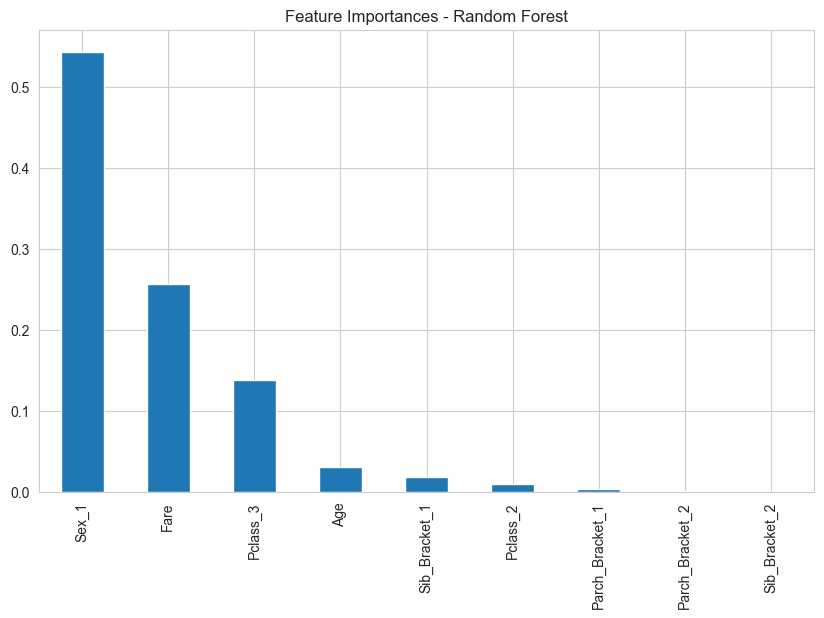

In [208]:
importance_rdf = pd.Series(best_rdf_model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importance_rdf.plot(kind='bar')
plt.title("Feature Importances - Random Forest")

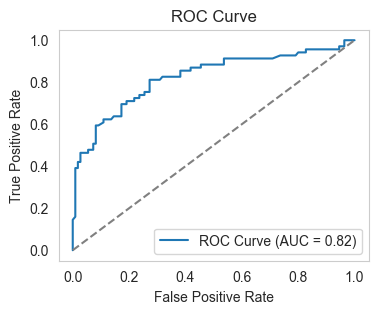

In [209]:
plot_roc_curve(x_test, y_test, best_rdf_model)

In [210]:
rdf_acc = accuracy_score(y_test, best_rdf_model.predict(x_test))
rdf_prec = precision_score(y_test, best_rdf_model.predict(x_test))
rdf_rec = recall_score(y_test, best_rdf_model.predict(x_test))
rdf_f1 = f1_score(y_test, best_rdf_model.predict(x_test))

The RandomForestClassifier performs slightly worse than XGBoost, Logistic Regression, and KNN, though its overall results remain consistent without signs of overfitting.

In [211]:
Model  = ['Logistic Regression', 'XGBoost', 'K-Nearest Neighbors', 'Random Forest']
Accuracy = [log_acc, xgb_acc, knn_acc, rdf_acc]
Precision = [log_prec, xgb_prec, knn_prec, rdf_prec]
Recall = [log_rec, xgb_rec, knn_rec, rdf_rec]
F1_Score = [log_f1, xgb_f1, knn_f1, rdf_f1]

model_performance = pd.DataFrame({
    'Model': Model,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1_Score': F1_Score
})
model_performance

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.832402,0.830508,0.710145,0.765625
1,XGBoost,0.815642,0.833333,0.652174,0.731707
2,K-Nearest Neighbors,0.815642,0.833333,0.652174,0.731707
3,Random Forest,0.765363,0.695652,0.695652,0.695652


- Some models like Logistic Regression, XGBoost, and KNN achieve very high accuracy (>80%), but sometimes this comes at the expense of recall.
- Although RandomForest shows slightly lower overall performance, it performs better when **Class 1 is prioritized**, making it a suitable choice in recall-sensitive scenarios.

In [212]:
result = test['PassengerId']
test.drop(columns=['PassengerId'], inplace=True)
test_dummies = pd.get_dummies(test, drop_first=True)
predictions = best_log_model.predict(test_dummies)
submission = pd.DataFrame({
    'PassengerId': result,
    'Survived': predictions
})


In [216]:
submission.to_csv('Submission/submission_log_11_11_25.csv', index=False)

`Logisitc Regression achieve approximately 0.766 on the test set`